### Linear Regression Homework

In [1]:
import tensorflow as tf
import pandas as pd

In [2]:
sess = tf.Session()
# Import data
df = pd.read_csv("LinearRegression.csv")

In [3]:
df.head()

,X,Y
0,6.2,29
1,9.5,44
2,10.5,36
3,7.7,37
4,8.6,53


In [4]:
# Parameters
learning_rate = 0.1
training_epochs = 10000
display_step = 1

In [5]:
# tf Graph Input
x = tf.placeholder(tf.float32, shape=(None,1)) 
y = tf.placeholder(tf.float32, shape=(None,1)) 

# Set model weights
W = tf.Variable(tf.random_normal([1,1]))
b = tf.Variable(tf.random_normal([1,1]))
print (x.get_shape().as_list())
print (W.get_shape().as_list())

[None, 1]
[1, 1]


In [12]:
# Construct model
logits = tf.matmul(x, W) + b ##this is linear regression
pred = tf.nn.softmax(logits) # Softmax , this is logistic regression

# Minimize error mean square error for linear regression
cost_linear = tf.reduce_mean(tf.reduce_sum((tf.square(logits-y)),reduction_indices=1))
#cost_linear = tf.losses.huber_loss(y,logits)

# Gradient Descent
optimizer_linear = tf.train.AdamOptimizer(learning_rate).minimize(cost_linear)

In [13]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [14]:
# no of correct prediction
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [15]:
data_X = tf.constant(df["X"],shape=[42,1])
print (data_X.get_shape().as_list())
data_Y = tf.constant(df["Y"],shape=[42,1])
print (data_Y.get_shape().as_list())
sess.run(data_X)
data = data_X.eval(session=sess)
sess.run(data_Y)
label = data_Y.eval(session=sess)

[42, 1]
[42, 1]


In [16]:
data.shape,label.shape

((42, 1), (42, 1))

In [17]:
# Run the initializer
sess.run(init)

# Training cycle
for epoch in range(training_epochs):
    # Run optimization op (backprop) and cost op (to get loss value)
    _, c = sess.run([optimizer_linear, cost_linear], feed_dict={x:data, y:label})
    # Display logs per epoch step
    if (epoch+1) % display_step == 0:
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))
print("Optimization Finished!")

Epoch: 0001 cost= 832.652832031
Epoch: 0002 cost= 769.706726074
Epoch: 0003 cost= 712.514831543
Epoch: 0004 cost= 661.153625488
Epoch: 0005 cost= 615.658081055
Epoch: 0006 cost= 576.014587402
Epoch: 0007 cost= 542.150573730
Epoch: 0008 cost= 513.924011230
Epoch: 0009 cost= 491.115386963
Epoch: 0010 cost= 473.419219971
Epoch: 0011 cost= 460.439605713
Epoch: 0012 cost= 451.691406250
Epoch: 0013 cost= 446.607330322
Epoch: 0014 cost= 444.553955078
Epoch: 0015 cost= 444.855651855
Epoch: 0016 cost= 446.826324463
Epoch: 0017 cost= 449.804321289
Epoch: 0018 cost= 453.187866211
Epoch: 0019 cost= 456.464996338
Epoch: 0020 cost= 459.234924316
Epoch: 0021 cost= 461.218109131
Epoch: 0022 cost= 462.255676270
Epoch: 0023 cost= 462.299072266
Epoch: 0024 cost= 461.392425537
Epoch: 0025 cost= 459.652160645
Epoch: 0026 cost= 457.243865967
Epoch: 0027 cost= 454.361083984
Epoch: 0028 cost= 451.205718994
Epoch: 0029 cost= 447.971069336
Epoch: 0030 cost= 444.829650879
Epoch: 0031 cost= 441.922790527
Epoch: 0

Epoch: 0356 cost= 361.330535889
Epoch: 0357 cost= 361.319335938
Epoch: 0358 cost= 361.308380127
Epoch: 0359 cost= 361.297637939
Epoch: 0360 cost= 361.287139893
Epoch: 0361 cost= 361.276855469
Epoch: 0362 cost= 361.266723633
Epoch: 0363 cost= 361.256805420
Epoch: 0364 cost= 361.247131348
Epoch: 0365 cost= 361.237640381
Epoch: 0366 cost= 361.228363037
Epoch: 0367 cost= 361.219268799
Epoch: 0368 cost= 361.210327148
Epoch: 0369 cost= 361.201629639
Epoch: 0370 cost= 361.193084717
Epoch: 0371 cost= 361.184661865
Epoch: 0372 cost= 361.176452637
Epoch: 0373 cost= 361.168395996
Epoch: 0374 cost= 361.160552979
Epoch: 0375 cost= 361.152832031
Epoch: 0376 cost= 361.145324707
Epoch: 0377 cost= 361.137939453
Epoch: 0378 cost= 361.130706787
Epoch: 0379 cost= 361.123626709
Epoch: 0380 cost= 361.116699219
Epoch: 0381 cost= 361.109924316
Epoch: 0382 cost= 361.103271484
Epoch: 0383 cost= 361.096771240
Epoch: 0384 cost= 361.090393066
Epoch: 0385 cost= 361.084228516
Epoch: 0386 cost= 361.078094482
Epoch: 0

Epoch: 0752 cost= 360.820159912
Epoch: 0753 cost= 360.820159912
Epoch: 0754 cost= 360.820159912
Epoch: 0755 cost= 360.820159912
Epoch: 0756 cost= 360.820159912
Epoch: 0757 cost= 360.820159912
Epoch: 0758 cost= 360.820159912
Epoch: 0759 cost= 360.820159912
Epoch: 0760 cost= 360.820159912
Epoch: 0761 cost= 360.820129395
Epoch: 0762 cost= 360.820159912
Epoch: 0763 cost= 360.820159912
Epoch: 0764 cost= 360.820159912
Epoch: 0765 cost= 360.820159912
Epoch: 0766 cost= 360.820159912
Epoch: 0767 cost= 360.820159912
Epoch: 0768 cost= 360.820159912
Epoch: 0769 cost= 360.820129395
Epoch: 0770 cost= 360.820159912
Epoch: 0771 cost= 360.820159912
Epoch: 0772 cost= 360.820129395
Epoch: 0773 cost= 360.820159912
Epoch: 0774 cost= 360.820190430
Epoch: 0775 cost= 360.820159912
Epoch: 0776 cost= 360.820159912
Epoch: 0777 cost= 360.820159912
Epoch: 0778 cost= 360.820159912
Epoch: 0779 cost= 360.820159912
Epoch: 0780 cost= 360.820159912
Epoch: 0781 cost= 360.820159912
Epoch: 0782 cost= 360.820159912
Epoch: 0

Epoch: 1206 cost= 360.820159912
Epoch: 1207 cost= 360.820159912
Epoch: 1208 cost= 360.820159912
Epoch: 1209 cost= 360.820159912
Epoch: 1210 cost= 360.820159912
Epoch: 1211 cost= 360.820159912
Epoch: 1212 cost= 360.820159912
Epoch: 1213 cost= 360.820159912
Epoch: 1214 cost= 360.820159912
Epoch: 1215 cost= 360.820159912
Epoch: 1216 cost= 360.820159912
Epoch: 1217 cost= 360.820159912
Epoch: 1218 cost= 360.820159912
Epoch: 1219 cost= 360.820159912
Epoch: 1220 cost= 360.820159912
Epoch: 1221 cost= 360.820159912
Epoch: 1222 cost= 360.820159912
Epoch: 1223 cost= 360.820159912
Epoch: 1224 cost= 360.820159912
Epoch: 1225 cost= 360.820159912
Epoch: 1226 cost= 360.820159912
Epoch: 1227 cost= 360.820159912
Epoch: 1228 cost= 360.820159912
Epoch: 1229 cost= 360.820159912
Epoch: 1230 cost= 360.820159912
Epoch: 1231 cost= 360.820159912
Epoch: 1232 cost= 360.820159912
Epoch: 1233 cost= 360.820159912
Epoch: 1234 cost= 360.820159912
Epoch: 1235 cost= 360.820159912
Epoch: 1236 cost= 360.820159912
Epoch: 1

Epoch: 1814 cost= 360.820129395
Epoch: 1815 cost= 360.820159912
Epoch: 1816 cost= 360.820159912
Epoch: 1817 cost= 360.820159912
Epoch: 1818 cost= 360.820159912
Epoch: 1819 cost= 360.820159912
Epoch: 1820 cost= 360.820129395
Epoch: 1821 cost= 360.820129395
Epoch: 1822 cost= 360.820129395
Epoch: 1823 cost= 360.820129395
Epoch: 1824 cost= 360.820129395
Epoch: 1825 cost= 360.820129395
Epoch: 1826 cost= 360.820129395
Epoch: 1827 cost= 360.820159912
Epoch: 1828 cost= 360.820159912
Epoch: 1829 cost= 360.820159912
Epoch: 1830 cost= 360.820159912
Epoch: 1831 cost= 360.820159912
Epoch: 1832 cost= 360.820129395
Epoch: 1833 cost= 360.820129395
Epoch: 1834 cost= 360.820129395
Epoch: 1835 cost= 360.820129395
Epoch: 1836 cost= 360.820129395
Epoch: 1837 cost= 360.820129395
Epoch: 1838 cost= 360.820129395
Epoch: 1839 cost= 360.820159912
Epoch: 1840 cost= 360.820159912
Epoch: 1841 cost= 360.820159912
Epoch: 1842 cost= 360.820159912
Epoch: 1843 cost= 360.820129395
Epoch: 1844 cost= 360.820129395
Epoch: 1

Epoch: 2179 cost= 360.820159912
Epoch: 2180 cost= 360.820159912
Epoch: 2181 cost= 360.820159912
Epoch: 2182 cost= 360.820159912
Epoch: 2183 cost= 360.820159912
Epoch: 2184 cost= 360.820159912
Epoch: 2185 cost= 360.820159912
Epoch: 2186 cost= 360.820159912
Epoch: 2187 cost= 360.820159912
Epoch: 2188 cost= 360.820159912
Epoch: 2189 cost= 360.820159912
Epoch: 2190 cost= 360.820159912
Epoch: 2191 cost= 360.820159912
Epoch: 2192 cost= 360.820159912
Epoch: 2193 cost= 360.820159912
Epoch: 2194 cost= 360.820159912
Epoch: 2195 cost= 360.820159912
Epoch: 2196 cost= 360.820159912
Epoch: 2197 cost= 360.820159912
Epoch: 2198 cost= 360.820159912
Epoch: 2199 cost= 360.820159912
Epoch: 2200 cost= 360.820159912
Epoch: 2201 cost= 360.820159912
Epoch: 2202 cost= 360.820159912
Epoch: 2203 cost= 360.820159912
Epoch: 2204 cost= 360.820159912
Epoch: 2205 cost= 360.820159912
Epoch: 2206 cost= 360.820159912
Epoch: 2207 cost= 360.820159912
Epoch: 2208 cost= 360.820159912
Epoch: 2209 cost= 360.820159912
Epoch: 2

Epoch: 2531 cost= 360.820159912
Epoch: 2532 cost= 360.820159912
Epoch: 2533 cost= 360.820159912
Epoch: 2534 cost= 360.820159912
Epoch: 2535 cost= 360.820159912
Epoch: 2536 cost= 360.820159912
Epoch: 2537 cost= 360.820159912
Epoch: 2538 cost= 360.820159912
Epoch: 2539 cost= 360.820159912
Epoch: 2540 cost= 360.820159912
Epoch: 2541 cost= 360.820159912
Epoch: 2542 cost= 360.820159912
Epoch: 2543 cost= 360.820159912
Epoch: 2544 cost= 360.820159912
Epoch: 2545 cost= 360.820159912
Epoch: 2546 cost= 360.820159912
Epoch: 2547 cost= 360.820159912
Epoch: 2548 cost= 360.820159912
Epoch: 2549 cost= 360.820159912
Epoch: 2550 cost= 360.820159912
Epoch: 2551 cost= 360.820159912
Epoch: 2552 cost= 360.820159912
Epoch: 2553 cost= 360.820159912
Epoch: 2554 cost= 360.820159912
Epoch: 2555 cost= 360.820159912
Epoch: 2556 cost= 360.820159912
Epoch: 2557 cost= 360.820159912
Epoch: 2558 cost= 360.820159912
Epoch: 2559 cost= 360.820159912
Epoch: 2560 cost= 360.820159912
Epoch: 2561 cost= 360.820159912
Epoch: 2

Epoch: 2853 cost= 360.820159912
Epoch: 2854 cost= 360.820159912
Epoch: 2855 cost= 360.820129395
Epoch: 2856 cost= 360.820129395
Epoch: 2857 cost= 360.820159912
Epoch: 2858 cost= 360.820159912
Epoch: 2859 cost= 360.820159912
Epoch: 2860 cost= 360.820159912
Epoch: 2861 cost= 360.820159912
Epoch: 2862 cost= 360.820159912
Epoch: 2863 cost= 360.820159912
Epoch: 2864 cost= 360.820159912
Epoch: 2865 cost= 360.820159912
Epoch: 2866 cost= 360.820159912
Epoch: 2867 cost= 360.820159912
Epoch: 2868 cost= 360.820159912
Epoch: 2869 cost= 360.820159912
Epoch: 2870 cost= 360.820159912
Epoch: 2871 cost= 360.820159912
Epoch: 2872 cost= 360.820159912
Epoch: 2873 cost= 360.820159912
Epoch: 2874 cost= 360.820159912
Epoch: 2875 cost= 360.820129395
Epoch: 2876 cost= 360.820129395
Epoch: 2877 cost= 360.820159912
Epoch: 2878 cost= 360.820159912
Epoch: 2879 cost= 360.820159912
Epoch: 2880 cost= 360.820159912
Epoch: 2881 cost= 360.820159912
Epoch: 2882 cost= 360.820159912
Epoch: 2883 cost= 360.820159912
Epoch: 2

Epoch: 3236 cost= 360.820159912
Epoch: 3237 cost= 360.820159912
Epoch: 3238 cost= 360.820159912
Epoch: 3239 cost= 360.820159912
Epoch: 3240 cost= 360.820159912
Epoch: 3241 cost= 360.820159912
Epoch: 3242 cost= 360.820159912
Epoch: 3243 cost= 360.820159912
Epoch: 3244 cost= 360.820159912
Epoch: 3245 cost= 360.820159912
Epoch: 3246 cost= 360.820159912
Epoch: 3247 cost= 360.820159912
Epoch: 3248 cost= 360.820159912
Epoch: 3249 cost= 360.820159912
Epoch: 3250 cost= 360.820159912
Epoch: 3251 cost= 360.820159912
Epoch: 3252 cost= 360.820159912
Epoch: 3253 cost= 360.820159912
Epoch: 3254 cost= 360.820159912
Epoch: 3255 cost= 360.820159912
Epoch: 3256 cost= 360.820159912
Epoch: 3257 cost= 360.820159912
Epoch: 3258 cost= 360.820159912
Epoch: 3259 cost= 360.820159912
Epoch: 3260 cost= 360.820159912
Epoch: 3261 cost= 360.820159912
Epoch: 3262 cost= 360.820159912
Epoch: 3263 cost= 360.820159912
Epoch: 3264 cost= 360.820159912
Epoch: 3265 cost= 360.820159912
Epoch: 3266 cost= 360.820159912
Epoch: 3

Epoch: 3584 cost= 360.820159912
Epoch: 3585 cost= 360.820159912
Epoch: 3586 cost= 360.820129395
Epoch: 3587 cost= 360.820129395
Epoch: 3588 cost= 360.820129395
Epoch: 3589 cost= 360.820159912
Epoch: 3590 cost= 360.820159912
Epoch: 3591 cost= 360.820159912
Epoch: 3592 cost= 360.820159912
Epoch: 3593 cost= 360.820159912
Epoch: 3594 cost= 360.820159912
Epoch: 3595 cost= 360.820129395
Epoch: 3596 cost= 360.820129395
Epoch: 3597 cost= 360.820129395
Epoch: 3598 cost= 360.820159912
Epoch: 3599 cost= 360.820159912
Epoch: 3600 cost= 360.820159912
Epoch: 3601 cost= 360.820159912
Epoch: 3602 cost= 360.820159912
Epoch: 3603 cost= 360.820159912
Epoch: 3604 cost= 360.820129395
Epoch: 3605 cost= 360.820129395
Epoch: 3606 cost= 360.820129395
Epoch: 3607 cost= 360.820159912
Epoch: 3608 cost= 360.820159912
Epoch: 3609 cost= 360.820159912
Epoch: 3610 cost= 360.820159912
Epoch: 3611 cost= 360.820159912
Epoch: 3612 cost= 360.820159912
Epoch: 3613 cost= 360.820129395
Epoch: 3614 cost= 360.820129395
Epoch: 3

Epoch: 3954 cost= 360.820129395
Epoch: 3955 cost= 360.820129395
Epoch: 3956 cost= 360.820129395
Epoch: 3957 cost= 360.820129395
Epoch: 3958 cost= 360.820129395
Epoch: 3959 cost= 360.820129395
Epoch: 3960 cost= 360.820129395
Epoch: 3961 cost= 360.820129395
Epoch: 3962 cost= 360.820129395
Epoch: 3963 cost= 360.820129395
Epoch: 3964 cost= 360.820129395
Epoch: 3965 cost= 360.820129395
Epoch: 3966 cost= 360.820159912
Epoch: 3967 cost= 360.820159912
Epoch: 3968 cost= 360.820129395
Epoch: 3969 cost= 360.820129395
Epoch: 3970 cost= 360.820129395
Epoch: 3971 cost= 360.820129395
Epoch: 3972 cost= 360.820159912
Epoch: 3973 cost= 360.820159912
Epoch: 3974 cost= 360.820129395
Epoch: 3975 cost= 360.820129395
Epoch: 3976 cost= 360.820129395
Epoch: 3977 cost= 360.820129395
Epoch: 3978 cost= 360.820159912
Epoch: 3979 cost= 360.820159912
Epoch: 3980 cost= 360.820129395
Epoch: 3981 cost= 360.820129395
Epoch: 3982 cost= 360.820129395
Epoch: 3983 cost= 360.820129395
Epoch: 3984 cost= 360.820159912
Epoch: 3

Epoch: 4314 cost= 360.820159912
Epoch: 4315 cost= 360.820159912
Epoch: 4316 cost= 360.820159912
Epoch: 4317 cost= 360.820159912
Epoch: 4318 cost= 360.820159912
Epoch: 4319 cost= 360.820159912
Epoch: 4320 cost= 360.820159912
Epoch: 4321 cost= 360.820159912
Epoch: 4322 cost= 360.820159912
Epoch: 4323 cost= 360.820159912
Epoch: 4324 cost= 360.820159912
Epoch: 4325 cost= 360.820159912
Epoch: 4326 cost= 360.820159912
Epoch: 4327 cost= 360.820159912
Epoch: 4328 cost= 360.820159912
Epoch: 4329 cost= 360.820159912
Epoch: 4330 cost= 360.820159912
Epoch: 4331 cost= 360.820159912
Epoch: 4332 cost= 360.820159912
Epoch: 4333 cost= 360.820159912
Epoch: 4334 cost= 360.820159912
Epoch: 4335 cost= 360.820159912
Epoch: 4336 cost= 360.820159912
Epoch: 4337 cost= 360.820159912
Epoch: 4338 cost= 360.820159912
Epoch: 4339 cost= 360.820159912
Epoch: 4340 cost= 360.820159912
Epoch: 4341 cost= 360.820159912
Epoch: 4342 cost= 360.820159912
Epoch: 4343 cost= 360.820159912
Epoch: 4344 cost= 360.820159912
Epoch: 4

Epoch: 4696 cost= 360.820129395
Epoch: 4697 cost= 360.820159912
Epoch: 4698 cost= 360.820159912
Epoch: 4699 cost= 360.820129395
Epoch: 4700 cost= 360.820159912
Epoch: 4701 cost= 360.820159912
Epoch: 4702 cost= 360.820129395
Epoch: 4703 cost= 360.820159912
Epoch: 4704 cost= 360.820159912
Epoch: 4705 cost= 360.820129395
Epoch: 4706 cost= 360.820159912
Epoch: 4707 cost= 360.820159912
Epoch: 4708 cost= 360.820129395
Epoch: 4709 cost= 360.820129395
Epoch: 4710 cost= 360.820129395
Epoch: 4711 cost= 360.820159912
Epoch: 4712 cost= 360.820129395
Epoch: 4713 cost= 360.820129395
Epoch: 4714 cost= 360.820129395
Epoch: 4715 cost= 360.820159912
Epoch: 4716 cost= 360.820159912
Epoch: 4717 cost= 360.820129395
Epoch: 4718 cost= 360.820159912
Epoch: 4719 cost= 360.820159912
Epoch: 4720 cost= 360.820159912
Epoch: 4721 cost= 360.820159912
Epoch: 4722 cost= 360.820129395
Epoch: 4723 cost= 360.820129395
Epoch: 4724 cost= 360.820129395
Epoch: 4725 cost= 360.820159912
Epoch: 4726 cost= 360.820159912
Epoch: 4

Epoch: 5068 cost= 360.820159912
Epoch: 5069 cost= 360.820129395
Epoch: 5070 cost= 360.820159912
Epoch: 5071 cost= 360.820129395
Epoch: 5072 cost= 360.820159912
Epoch: 5073 cost= 360.820159912
Epoch: 5074 cost= 360.820129395
Epoch: 5075 cost= 360.820159912
Epoch: 5076 cost= 360.820129395
Epoch: 5077 cost= 360.820159912
Epoch: 5078 cost= 360.820159912
Epoch: 5079 cost= 360.820129395
Epoch: 5080 cost= 360.820159912
Epoch: 5081 cost= 360.820129395
Epoch: 5082 cost= 360.820159912
Epoch: 5083 cost= 360.820159912
Epoch: 5084 cost= 360.820129395
Epoch: 5085 cost= 360.820159912
Epoch: 5086 cost= 360.820129395
Epoch: 5087 cost= 360.820159912
Epoch: 5088 cost= 360.820159912
Epoch: 5089 cost= 360.820129395
Epoch: 5090 cost= 360.820159912
Epoch: 5091 cost= 360.820129395
Epoch: 5092 cost= 360.820159912
Epoch: 5093 cost= 360.820159912
Epoch: 5094 cost= 360.820129395
Epoch: 5095 cost= 360.820159912
Epoch: 5096 cost= 360.820129395
Epoch: 5097 cost= 360.820159912
Epoch: 5098 cost= 360.820159912
Epoch: 5

Epoch: 5465 cost= 360.820159912
Epoch: 5466 cost= 360.820159912
Epoch: 5467 cost= 360.820159912
Epoch: 5468 cost= 360.820159912
Epoch: 5469 cost= 360.820159912
Epoch: 5470 cost= 360.820159912
Epoch: 5471 cost= 360.820159912
Epoch: 5472 cost= 360.820159912
Epoch: 5473 cost= 360.820159912
Epoch: 5474 cost= 360.820159912
Epoch: 5475 cost= 360.820159912
Epoch: 5476 cost= 360.820159912
Epoch: 5477 cost= 360.820159912
Epoch: 5478 cost= 360.820159912
Epoch: 5479 cost= 360.820159912
Epoch: 5480 cost= 360.820159912
Epoch: 5481 cost= 360.820159912
Epoch: 5482 cost= 360.820159912
Epoch: 5483 cost= 360.820159912
Epoch: 5484 cost= 360.820159912
Epoch: 5485 cost= 360.820159912
Epoch: 5486 cost= 360.820159912
Epoch: 5487 cost= 360.820159912
Epoch: 5488 cost= 360.820159912
Epoch: 5489 cost= 360.820159912
Epoch: 5490 cost= 360.820159912
Epoch: 5491 cost= 360.820159912
Epoch: 5492 cost= 360.820159912
Epoch: 5493 cost= 360.820159912
Epoch: 5494 cost= 360.820159912
Epoch: 5495 cost= 360.820159912
Epoch: 5

Epoch: 5889 cost= 360.820159912
Epoch: 5890 cost= 360.820159912
Epoch: 5891 cost= 360.820159912
Epoch: 5892 cost= 360.820159912
Epoch: 5893 cost= 360.820159912
Epoch: 5894 cost= 360.820159912
Epoch: 5895 cost= 360.820159912
Epoch: 5896 cost= 360.820159912
Epoch: 5897 cost= 360.820159912
Epoch: 5898 cost= 360.820159912
Epoch: 5899 cost= 360.820159912
Epoch: 5900 cost= 360.820159912
Epoch: 5901 cost= 360.820159912
Epoch: 5902 cost= 360.820159912
Epoch: 5903 cost= 360.820159912
Epoch: 5904 cost= 360.820159912
Epoch: 5905 cost= 360.820159912
Epoch: 5906 cost= 360.820159912
Epoch: 5907 cost= 360.820159912
Epoch: 5908 cost= 360.820159912
Epoch: 5909 cost= 360.820159912
Epoch: 5910 cost= 360.820159912
Epoch: 5911 cost= 360.820159912
Epoch: 5912 cost= 360.820159912
Epoch: 5913 cost= 360.820159912
Epoch: 5914 cost= 360.820159912
Epoch: 5915 cost= 360.820159912
Epoch: 5916 cost= 360.820159912
Epoch: 5917 cost= 360.820159912
Epoch: 5918 cost= 360.820159912
Epoch: 5919 cost= 360.820159912
Epoch: 5

Epoch: 6387 cost= 360.820159912
Epoch: 6388 cost= 360.820159912
Epoch: 6389 cost= 360.820159912
Epoch: 6390 cost= 360.820159912
Epoch: 6391 cost= 360.820159912
Epoch: 6392 cost= 360.820159912
Epoch: 6393 cost= 360.820159912
Epoch: 6394 cost= 360.820159912
Epoch: 6395 cost= 360.820159912
Epoch: 6396 cost= 360.820159912
Epoch: 6397 cost= 360.820159912
Epoch: 6398 cost= 360.820159912
Epoch: 6399 cost= 360.820159912
Epoch: 6400 cost= 360.820159912
Epoch: 6401 cost= 360.820159912
Epoch: 6402 cost= 360.820159912
Epoch: 6403 cost= 360.820159912
Epoch: 6404 cost= 360.820159912
Epoch: 6405 cost= 360.820159912
Epoch: 6406 cost= 360.820159912
Epoch: 6407 cost= 360.820159912
Epoch: 6408 cost= 360.820159912
Epoch: 6409 cost= 360.820159912
Epoch: 6410 cost= 360.820159912
Epoch: 6411 cost= 360.820159912
Epoch: 6412 cost= 360.820159912
Epoch: 6413 cost= 360.820159912
Epoch: 6414 cost= 360.820159912
Epoch: 6415 cost= 360.820159912
Epoch: 6416 cost= 360.820159912
Epoch: 6417 cost= 360.820159912
Epoch: 6

Epoch: 6665 cost= 360.820159912
Epoch: 6666 cost= 360.820159912
Epoch: 6667 cost= 360.820159912
Epoch: 6668 cost= 360.820159912
Epoch: 6669 cost= 360.820159912
Epoch: 6670 cost= 360.820159912
Epoch: 6671 cost= 360.820159912
Epoch: 6672 cost= 360.820159912
Epoch: 6673 cost= 360.820159912
Epoch: 6674 cost= 360.820159912
Epoch: 6675 cost= 360.820159912
Epoch: 6676 cost= 360.820159912
Epoch: 6677 cost= 360.820159912
Epoch: 6678 cost= 360.820159912
Epoch: 6679 cost= 360.820159912
Epoch: 6680 cost= 360.820159912
Epoch: 6681 cost= 360.820159912
Epoch: 6682 cost= 360.820159912
Epoch: 6683 cost= 360.820159912
Epoch: 6684 cost= 360.820159912
Epoch: 6685 cost= 360.820159912
Epoch: 6686 cost= 360.820159912
Epoch: 6687 cost= 360.820159912
Epoch: 6688 cost= 360.820159912
Epoch: 6689 cost= 360.820159912
Epoch: 6690 cost= 360.820159912
Epoch: 6691 cost= 360.820159912
Epoch: 6692 cost= 360.820159912
Epoch: 6693 cost= 360.820159912
Epoch: 6694 cost= 360.820159912
Epoch: 6695 cost= 360.820159912
Epoch: 6

Epoch: 6957 cost= 360.820159912
Epoch: 6958 cost= 360.820159912
Epoch: 6959 cost= 360.820159912
Epoch: 6960 cost= 360.820159912
Epoch: 6961 cost= 360.820159912
Epoch: 6962 cost= 360.820159912
Epoch: 6963 cost= 360.820159912
Epoch: 6964 cost= 360.820159912
Epoch: 6965 cost= 360.820159912
Epoch: 6966 cost= 360.820159912
Epoch: 6967 cost= 360.820159912
Epoch: 6968 cost= 360.820159912
Epoch: 6969 cost= 360.820159912
Epoch: 6970 cost= 360.820159912
Epoch: 6971 cost= 360.820159912
Epoch: 6972 cost= 360.820159912
Epoch: 6973 cost= 360.820159912
Epoch: 6974 cost= 360.820159912
Epoch: 6975 cost= 360.820159912
Epoch: 6976 cost= 360.820159912
Epoch: 6977 cost= 360.820159912
Epoch: 6978 cost= 360.820159912
Epoch: 6979 cost= 360.820159912
Epoch: 6980 cost= 360.820159912
Epoch: 6981 cost= 360.820159912
Epoch: 6982 cost= 360.820159912
Epoch: 6983 cost= 360.820159912
Epoch: 6984 cost= 360.820159912
Epoch: 6985 cost= 360.820159912
Epoch: 6986 cost= 360.820159912
Epoch: 6987 cost= 360.820159912
Epoch: 6

Epoch: 7224 cost= 360.820251465
Epoch: 7225 cost= 360.820220947
Epoch: 7226 cost= 360.820159912
Epoch: 7227 cost= 360.820251465
Epoch: 7228 cost= 360.820159912
Epoch: 7229 cost= 360.820190430
Epoch: 7230 cost= 360.820251465
Epoch: 7231 cost= 360.820159912
Epoch: 7232 cost= 360.820159912
Epoch: 7233 cost= 360.820190430
Epoch: 7234 cost= 360.820159912
Epoch: 7235 cost= 360.820159912
Epoch: 7236 cost= 360.820159912
Epoch: 7237 cost= 360.820159912
Epoch: 7238 cost= 360.820159912
Epoch: 7239 cost= 360.820159912
Epoch: 7240 cost= 360.820129395
Epoch: 7241 cost= 360.820159912
Epoch: 7242 cost= 360.820159912
Epoch: 7243 cost= 360.820159912
Epoch: 7244 cost= 360.820159912
Epoch: 7245 cost= 360.820129395
Epoch: 7246 cost= 360.820159912
Epoch: 7247 cost= 360.820159912
Epoch: 7248 cost= 360.820159912
Epoch: 7249 cost= 360.820159912
Epoch: 7250 cost= 360.820159912
Epoch: 7251 cost= 360.820159912
Epoch: 7252 cost= 360.820098877
Epoch: 7253 cost= 360.820159912
Epoch: 7254 cost= 360.820159912
Epoch: 7

Epoch: 7529 cost= 360.820159912
Epoch: 7530 cost= 360.820159912
Epoch: 7531 cost= 360.820159912
Epoch: 7532 cost= 360.820159912
Epoch: 7533 cost= 360.820159912
Epoch: 7534 cost= 360.820159912
Epoch: 7535 cost= 360.820129395
Epoch: 7536 cost= 360.820159912
Epoch: 7537 cost= 360.820129395
Epoch: 7538 cost= 360.820159912
Epoch: 7539 cost= 360.820129395
Epoch: 7540 cost= 360.820159912
Epoch: 7541 cost= 360.820159912
Epoch: 7542 cost= 360.820159912
Epoch: 7543 cost= 360.820159912
Epoch: 7544 cost= 360.820159912
Epoch: 7545 cost= 360.820159912
Epoch: 7546 cost= 360.820129395
Epoch: 7547 cost= 360.820159912
Epoch: 7548 cost= 360.820129395
Epoch: 7549 cost= 360.820159912
Epoch: 7550 cost= 360.820129395
Epoch: 7551 cost= 360.820159912
Epoch: 7552 cost= 360.820159912
Epoch: 7553 cost= 360.820159912
Epoch: 7554 cost= 360.820159912
Epoch: 7555 cost= 360.820159912
Epoch: 7556 cost= 360.820159912
Epoch: 7557 cost= 360.820129395
Epoch: 7558 cost= 360.820159912
Epoch: 7559 cost= 360.820129395
Epoch: 7

Epoch: 7850 cost= 360.820129395
Epoch: 7851 cost= 360.820129395
Epoch: 7852 cost= 360.820159912
Epoch: 7853 cost= 360.820159912
Epoch: 7854 cost= 360.820159912
Epoch: 7855 cost= 360.820129395
Epoch: 7856 cost= 360.820129395
Epoch: 7857 cost= 360.820159912
Epoch: 7858 cost= 360.820159912
Epoch: 7859 cost= 360.820159912
Epoch: 7860 cost= 360.820129395
Epoch: 7861 cost= 360.820159912
Epoch: 7862 cost= 360.820159912
Epoch: 7863 cost= 360.820159912
Epoch: 7864 cost= 360.820129395
Epoch: 7865 cost= 360.820129395
Epoch: 7866 cost= 360.820159912
Epoch: 7867 cost= 360.820159912
Epoch: 7868 cost= 360.820159912
Epoch: 7869 cost= 360.820129395
Epoch: 7870 cost= 360.820129395
Epoch: 7871 cost= 360.820129395
Epoch: 7872 cost= 360.820159912
Epoch: 7873 cost= 360.820129395
Epoch: 7874 cost= 360.820129395
Epoch: 7875 cost= 360.820159912
Epoch: 7876 cost= 360.820159912
Epoch: 7877 cost= 360.820159912
Epoch: 7878 cost= 360.820159912
Epoch: 7879 cost= 360.820159912
Epoch: 7880 cost= 360.820159912
Epoch: 7

Epoch: 8213 cost= 360.820159912
Epoch: 8214 cost= 360.820129395
Epoch: 8215 cost= 360.820159912
Epoch: 8216 cost= 360.820159912
Epoch: 8217 cost= 360.820159912
Epoch: 8218 cost= 360.820159912
Epoch: 8219 cost= 360.820159912
Epoch: 8220 cost= 360.820129395
Epoch: 8221 cost= 360.820159912
Epoch: 8222 cost= 360.820129395
Epoch: 8223 cost= 360.820159912
Epoch: 8224 cost= 360.820159912
Epoch: 8225 cost= 360.820159912
Epoch: 8226 cost= 360.820190430
Epoch: 8227 cost= 360.820159912
Epoch: 8228 cost= 360.820159912
Epoch: 8229 cost= 360.820129395
Epoch: 8230 cost= 360.820129395
Epoch: 8231 cost= 360.820159912
Epoch: 8232 cost= 360.820159912
Epoch: 8233 cost= 360.820159912
Epoch: 8234 cost= 360.820159912
Epoch: 8235 cost= 360.820159912
Epoch: 8236 cost= 360.820190430
Epoch: 8237 cost= 360.820159912
Epoch: 8238 cost= 360.820220947
Epoch: 8239 cost= 360.820190430
Epoch: 8240 cost= 360.820251465
Epoch: 8241 cost= 360.820343018
Epoch: 8242 cost= 360.820526123
Epoch: 8243 cost= 360.820739746
Epoch: 8

Epoch: 8633 cost= 360.820159912
Epoch: 8634 cost= 360.820159912
Epoch: 8635 cost= 360.820190430
Epoch: 8636 cost= 360.820159912
Epoch: 8637 cost= 360.820159912
Epoch: 8638 cost= 360.820159912
Epoch: 8639 cost= 360.820129395
Epoch: 8640 cost= 360.820159912
Epoch: 8641 cost= 360.820159912
Epoch: 8642 cost= 360.820159912
Epoch: 8643 cost= 360.820159912
Epoch: 8644 cost= 360.820159912
Epoch: 8645 cost= 360.820159912
Epoch: 8646 cost= 360.820159912
Epoch: 8647 cost= 360.820159912
Epoch: 8648 cost= 360.820159912
Epoch: 8649 cost= 360.820159912
Epoch: 8650 cost= 360.820159912
Epoch: 8651 cost= 360.820190430
Epoch: 8652 cost= 360.820129395
Epoch: 8653 cost= 360.820159912
Epoch: 8654 cost= 360.820159912
Epoch: 8655 cost= 360.820159912
Epoch: 8656 cost= 360.820159912
Epoch: 8657 cost= 360.820129395
Epoch: 8658 cost= 360.820159912
Epoch: 8659 cost= 360.820159912
Epoch: 8660 cost= 360.820159912
Epoch: 8661 cost= 360.820159912
Epoch: 8662 cost= 360.820159912
Epoch: 8663 cost= 360.820129395
Epoch: 8

Epoch: 8990 cost= 360.820159912
Epoch: 8991 cost= 360.820159912
Epoch: 8992 cost= 360.820159912
Epoch: 8993 cost= 360.820129395
Epoch: 8994 cost= 360.820129395
Epoch: 8995 cost= 360.820129395
Epoch: 8996 cost= 360.820159912
Epoch: 8997 cost= 360.820159912
Epoch: 8998 cost= 360.820129395
Epoch: 8999 cost= 360.820129395
Epoch: 9000 cost= 360.820159912
Epoch: 9001 cost= 360.820159912
Epoch: 9002 cost= 360.820159912
Epoch: 9003 cost= 360.820159912
Epoch: 9004 cost= 360.820159912
Epoch: 9005 cost= 360.820159912
Epoch: 9006 cost= 360.820159912
Epoch: 9007 cost= 360.820159912
Epoch: 9008 cost= 360.820159912
Epoch: 9009 cost= 360.820159912
Epoch: 9010 cost= 360.820159912
Epoch: 9011 cost= 360.820159912
Epoch: 9012 cost= 360.820159912
Epoch: 9013 cost= 360.820159912
Epoch: 9014 cost= 360.820159912
Epoch: 9015 cost= 360.820159912
Epoch: 9016 cost= 360.820159912
Epoch: 9017 cost= 360.820159912
Epoch: 9018 cost= 360.820129395
Epoch: 9019 cost= 360.820159912
Epoch: 9020 cost= 360.820159912
Epoch: 9

Epoch: 9407 cost= 360.820159912
Epoch: 9408 cost= 360.820159912
Epoch: 9409 cost= 360.820159912
Epoch: 9410 cost= 360.820129395
Epoch: 9411 cost= 360.820159912
Epoch: 9412 cost= 360.820159912
Epoch: 9413 cost= 360.820159912
Epoch: 9414 cost= 360.820159912
Epoch: 9415 cost= 360.820159912
Epoch: 9416 cost= 360.820159912
Epoch: 9417 cost= 360.820098877
Epoch: 9418 cost= 360.820159912
Epoch: 9419 cost= 360.820159912
Epoch: 9420 cost= 360.820159912
Epoch: 9421 cost= 360.820159912
Epoch: 9422 cost= 360.820190430
Epoch: 9423 cost= 360.820220947
Epoch: 9424 cost= 360.820312500
Epoch: 9425 cost= 360.820434570
Epoch: 9426 cost= 360.820648193
Epoch: 9427 cost= 360.821044922
Epoch: 9428 cost= 360.821716309
Epoch: 9429 cost= 360.822998047
Epoch: 9430 cost= 360.825256348
Epoch: 9431 cost= 360.829437256
Epoch: 9432 cost= 360.836700439
Epoch: 9433 cost= 360.849029541
Epoch: 9434 cost= 360.868072510
Epoch: 9435 cost= 360.892974854
Epoch: 9436 cost= 360.915313721
Epoch: 9437 cost= 360.917114258
Epoch: 9

Epoch: 9791 cost= 360.836578369
Epoch: 9792 cost= 360.825958252
Epoch: 9793 cost= 360.820159912
Epoch: 9794 cost= 360.824279785
Epoch: 9795 cost= 360.830566406
Epoch: 9796 cost= 360.830230713
Epoch: 9797 cost= 360.824157715
Epoch: 9798 cost= 360.820220947
Epoch: 9799 cost= 360.822296143
Epoch: 9800 cost= 360.826141357
Epoch: 9801 cost= 360.826171875
Epoch: 9802 cost= 360.822631836
Epoch: 9803 cost= 360.820190430
Epoch: 9804 cost= 360.821350098
Epoch: 9805 cost= 360.823669434
Epoch: 9806 cost= 360.823760986
Epoch: 9807 cost= 360.821685791
Epoch: 9808 cost= 360.820190430
Epoch: 9809 cost= 360.820861816
Epoch: 9810 cost= 360.822204590
Epoch: 9811 cost= 360.822326660
Epoch: 9812 cost= 360.821105957
Epoch: 9813 cost= 360.820159912
Epoch: 9814 cost= 360.820526123
Epoch: 9815 cost= 360.821350098
Epoch: 9816 cost= 360.821441650
Epoch: 9817 cost= 360.820770264
Epoch: 9818 cost= 360.820159912
Epoch: 9819 cost= 360.820312500
Epoch: 9820 cost= 360.820861816
Epoch: 9821 cost= 360.820953369
Epoch: 9

In [18]:
import numpy as np
dataT = np.transpose(data)
labelT = np.transpose(label)

In [19]:
weight = W.eval(session=sess)
bias = b.eval(session=sess)
print (weight.shape)
print (bias.shape)
print (weight)
print (bias)

(1, 1)
(1, 1)
[[ 1.31345773]]
[[ 16.99515724]]


In [20]:
import matplotlib.pyplot as plt

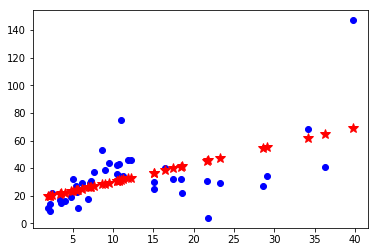

In [21]:
plt.plot(dataT, labelT, 'bo', label='Actual data')
plt.plot(dataT,dataT*weight+bias,color='red', linestyle='solid', marker='*',markerfacecolor='red', markersize=10)
#plt.legend()
plt.show()